In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

#Loading Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

plt.style.use('ggplot')

import nltk

/kaggle/input/mental-health-insights-vulnerable-cancer-patients/Mental Health Dataset.csv


In [36]:
#Import Dataset
dataset = pd.read_csv('/Users/tanvir/Desktop/ML_Project/NLP_Project/Dataset/Mental\ Health\ Dataset.csv ')
print(dataset.shape)
dataset.head()

(10392, 3)


,posts,predicted,intensity
0,I know as parent of child with down syndrome t...,negative,-1
1,but in my heart I know this is the future prom...,neutral,0
2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,from one of my health group subject wayne dyer...,neutral,0
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0


In [37]:
#Calculate value counts
values = dataset['intensity'].value_counts().sort_index()

#Calculate the percentage
total_samples = values.sum()
percentage = values/total_samples * 100

The dataset is based on cancer patients post in mental health based platform. The intensity is basically scaled between -2 to 1.Negative scores (-1 or -2) were given for posts showing grief or suffering, positive scores (1) for happy emotions like relief or accomplishment, and posts with no emotion received a score of 0 and were considered neutral.

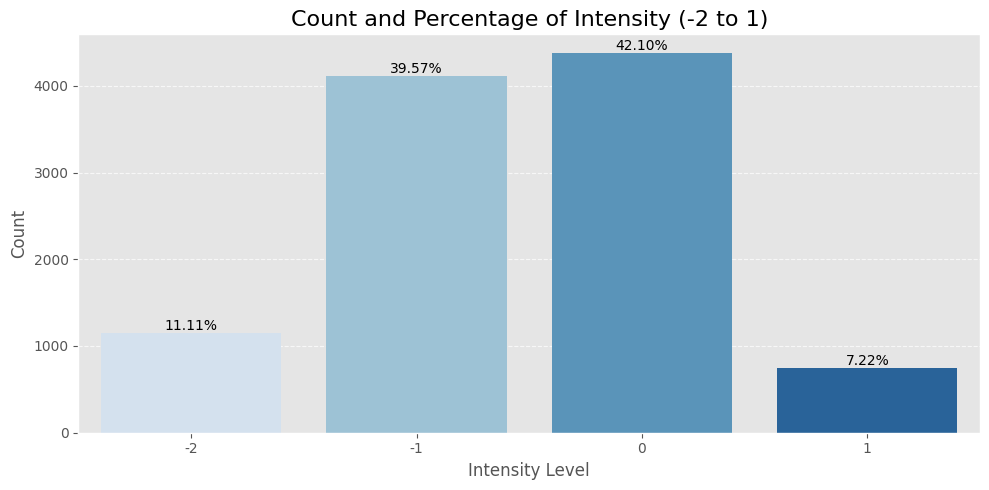

In [38]:
# Plotting with seaborn
plt.figure(figsize=(10, 5))
plot = sns.barplot(x=values.index, y=values.values, palette='Blues')

# Adding percentage labels on top of each bar
for i, v in enumerate(values):
    plot.text(i, v + 0.5, f"{percentage.iloc[i]:.2f}%", ha='center', va='bottom')

# Customizing plot attributes
plt.title('Count and Percentage of Intensity (-2 to 1)', fontsize=16)
plt.xlabel('Intensity Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

From the plot it can be concluded that almost 42.10% of the posts were recieved with no emotions and 39.57% posts shows grief or suffering and lowest amount of people shows happiness of position emotion which is only 7.22%. Which seems like very natural.

## Creating Wordcloud

(10392, 3)


/tmp/ipykernel_33/3760616215.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].fillna('').astype(str)


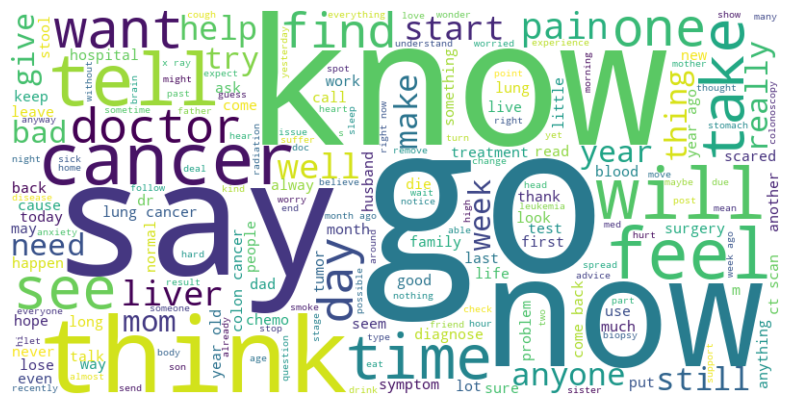

In [39]:
# Function to generate word cloud
def generate_wordcloud(data, column, predicted_value=None, intensity_value=None):
    if predicted_value is not None:
        data = data[data['predicted'] == predicted_value]
    if intensity_value is not None:
        data = data[data['intensity'] == intensity_value]
    
    # Convert NaN or float values to empty strings
    data[column] = data[column].fillna('').astype(str)
    
    text = ' '.join(data[column].values)
    
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Displaying the shape of the dataset and the first few rows
print(dataset.shape)
#print(dataset.head())

# Generate word cloud dynamically
generate_wordcloud(dataset, 'posts', predicted_value=None, intensity_value= -1)

**Basics of NLP**

In [40]:
example = dataset['posts'][50]
print(example)

I realize I do not need to explain anything to you all but I just want to I have often wonder if I should change my pass name from jesus is our saviour to some less in your face type of thing I guess I can not anyway so be it that is the way it is when my precious husband ben was diagnose with aml terminal leukemia in december 2011 we were both devastate he have few symptom except tiredness and a flu type symptom we were tell he may have long if he undertake a bone marrow transplant my husband was the only one who could make all these decision for his life he ask for a night of prayer to get god answer and will for his life I have search frantically on the internet for information on treatment and anything which would give tangible medical answer then I find ds forum for aml leukemia to join I need a password in my frantic state of despair all my mind was on was jesus jesus no this can not be true no no you can not do this do not take my husband away from I I beg of you that is when I 

In [41]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I', 'realize', 'I', 'do', 'not', 'need', 'to', 'explain', 'anything', 'to']

After dividing it into in tokens we will do POS (Parts of Speech) Tagging. NLTK has specific library for pos tagging. 

In [42]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('realize', 'VBP'),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ('not', 'RB'),
 ('need', 'VB'),
 ('to', 'TO'),
 ('explain', 'VB'),
 ('anything', 'NN'),
 ('to', 'TO')]

In [43]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  realize/VBP
  I/PRP
  do/VBP
  not/RB
  need/VB
  to/TO
  explain/VB
  anything/NN
  to/TO
  you/PRP
  all/DT
  but/CC
  I/PRP
  just/RB
  want/VBP
  to/TO
  I/PRP
  have/VBP
  often/RB
  wonder/VBP
  if/IN
  I/PRP
  should/MD
  change/VB
  my/PRP$
  pass/NN
  name/NN
  from/IN
  jesus/NN
  is/VBZ
  our/PRP$
  saviour/NN
  to/TO
  some/DT
  less/RBR
  in/IN
  your/PRP$
  face/NN
  type/NN
  of/IN
  thing/NN
  I/PRP
  guess/VBP
  I/PRP
  can/MD
  not/RB
  anyway/VB
  so/RB
  be/VB
  it/PRP
  that/WDT
  is/VBZ
  the/DT
  way/NN
  it/PRP
  is/VBZ
  when/WRB
  my/PRP$
  precious/JJ
  husband/NN
  ben/NN
  was/VBD
  diagnose/JJ
  with/IN
  aml/JJ
  terminal/JJ
  leukemia/NN
  in/IN
  december/JJ
  2011/CD
  we/PRP
  were/VBD
  both/DT
  devastate/NN
  he/PRP
  have/VBP
  few/JJ
  symptom/NN
  except/IN
  tiredness/NN
  and/CC
  a/DT
  flu/NN
  type/NN
  symptom/NN
  we/PRP
  were/VBD
  tell/VB
  he/PRP
  may/MD
  have/VB
  long/RB
  if/IN
  he/PRP
  undertake/VBZ
  a/DT
  bone/

# VADER Sentiment Scoring

In [44]:
vsentan = SentimentIntensityAnalyzer()

In [45]:
vsentan.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [46]:
nlp_use = dataset['posts']

In [47]:
vsentan.polarity_scores(example)

{'neg': 0.121, 'neu': 0.774, 'pos': 0.105, 'compound': -0.7209}

In [48]:
dataset.reset_index(inplace=True)

# Rename the new index column to 'id'
dataset.rename(columns={'index': 'id'}, inplace=True)

dataset.head()

,id,posts,predicted,intensity
0,0,I know as parent of child with down syndrome t...,negative,-1
1,1,but in my heart I know this is the future prom...,neutral,0
2,2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,3,from one of my health group subject wayne dyer...,neutral,0
4,4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0


In [49]:
res = {}
for i, row in tqdm(dataset.iterrows(), total=len(dataset)):
    text = str(row['posts'])  # Ensure text is converted to string
    myid = row['id']
    if isinstance(text, str):  # Check if text is a string
        res[myid] = vsentan.polarity_scores(text)
    else:
        res[myid] = {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}  # Assign default scores if text is not a string

  0%|          | 0/10392 [00:00<?, ?it/s]

In [50]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.merge(dataset, how='left')

In [51]:
vaders.head()

,id,neg,neu,pos,compound,posts,predicted,intensity
0,0,0.097,0.812,0.091,-0.9162,I know as parent of child with down syndrome t...,negative,-1
1,1,0.206,0.707,0.086,-0.9987,but in my heart I know this is the future prom...,neutral,0
2,2,0.066,0.835,0.099,0.9253,I have mylefibrosis which turn to leukemia the...,negative,-1
3,3,0.010,0.872,0.119,0.9849,from one of my health group subject wayne dyer...,neutral,0
4,4,0.000,1.000,0.000,0.0000,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0


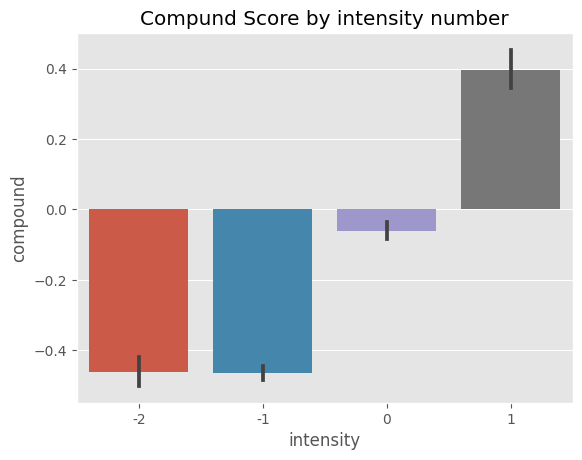

In [52]:
#Testing if our model worked in expected way or not
testing_plot_vaders = sns.barplot(data=vaders, x='intensity', y='compound')
testing_plot_vaders.set_title('Compund Score by intensity number')
plt.show()


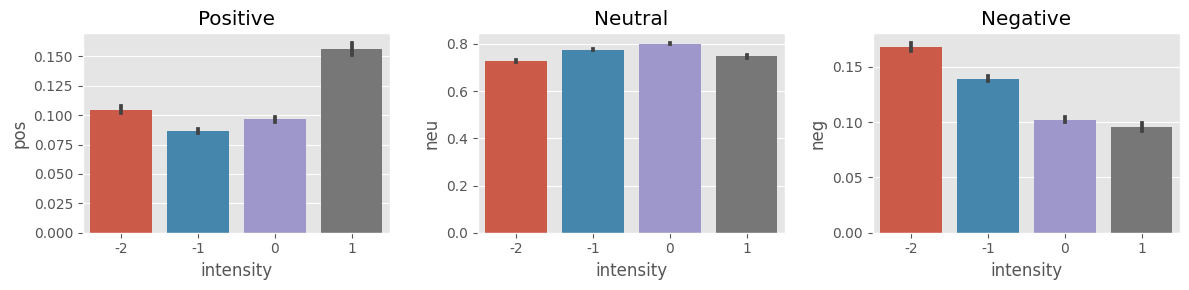

In [53]:
fig, testing_plot_vaders = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='intensity', y='pos', ax=testing_plot_vaders[0])
sns.barplot(data=vaders, x='intensity', y='neu', ax=testing_plot_vaders[1])
sns.barplot(data=vaders, x='intensity', y='neg', ax=testing_plot_vaders[2])
testing_plot_vaders[0].set_title('Positive')
testing_plot_vaders[1].set_title('Neutral')
testing_plot_vaders[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [54]:
dataset

,id,posts,predicted,intensity
0,0,I know as parent of child with down syndrome t...,negative,-1
1,1,but in my heart I know this is the future prom...,neutral,0
2,2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,3,from one of my health group subject wayne dyer...,neutral,0
4,4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0
...,...,...,...,...
10387,10387,hey everyone I am a 25 year old male I work ou...,negative,-1
10388,10388,have surgery for stage 1 colon cancer 1 year a...,very negative,-2
10389,10389,the doctor advise we he could not remove the a...,neutral,0
10390,10390,my 66 year old father have been through so muc...,neutral,0


# Using Roberta Pretrained Model


In [ ]:
import pandas as pd
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from nltk.sentiment import SentimentIntensityAnalyzer

# Load VADER
vsentan = SentimentIntensityAnalyzer()

# Load RoBERTa model and tokenizer
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

def polarity_scores_roberta(text):
    # Tokenize the text
    inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
    # Pass the inputs through the model
    output = model(**inputs)
    # Softmax on the logits
    scores = softmax(output.logits[0].detach().numpy())
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

# Function to process DataFrame
def process_dataframe(df):
    results = []
    for i, row in tqdm(df.iterrows(), total=len(df)):
        try:
            text = row['posts']
            myid = row['id']
            vader_result = vsentan.polarity_scores(text)
            vader_result_rename = {f"vader_{key}": value for key, value in vader_result.items()}
            roberta_result = polarity_scores_roberta(text)
            combined_result = {**vader_result_rename, **roberta_result, 'id': myid}
            results.append(combined_result)
        except Exception as e:
            print(f'Error processing row with id {myid}: {e}')
    return pd.DataFrame(results)

# Process DataFrame
results_df = process_dataframe(dataset)

# Merge with original DataFrame
results_df = results_df.merge(dataset, how='left', on='id')


 38%|███▊      | 3982/10392 [32:36<06:05, 17.52it/s]  

Error processing row with id 3979: 'float' object has no attribute 'encode'


 54%|█████▎    | 5582/10392 [42:30<41:07,  1.95it/s]  